# Prueba técnica
Para el desarrollo de la prueba es necesario cargar las siguientes bibliotecas (librerias):
- Numpy
- Pandas
- Matplot
- Rasterio

In [818]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import rasterio as rio

Teniendo las bibliotecas cargadas se procede a cargar la data cruda ubicada en el archivo acelero.txt

In [819]:
df_acelero = pd.read_csv("./acelero.txt")
print(df_acelero)

         Tiempo  Posición  Temperatura
0    1695686400 -7.501667    32.524667
1    1695690000 -7.505167    32.528167
2    1695693600 -7.504500    32.522000
3    1695697200 -7.500500    32.517833
4    1695700800 -7.504167    32.531667
..          ...       ...          ...
692  1698177600 -7.409583    31.729000
693  1698181200 -7.400417    31.721833
694  1698184800 -7.398083    31.721833
695  1698188400 -7.401083    31.716833
696  1698192000 -7.420000    31.720000

[697 rows x 3 columns]


Para una mejor visualización al momento del análisis se convierten los datos de tiempo (FORMATO UNIX) a fecha (año-mes-día y hora) en una nueva columna llamada "Fecha"

In [820]:
df_acelero["Fecha"] = pd.to_datetime(df_acelero["Tiempo"], unit="s")
print(df_acelero)

         Tiempo  Posición  Temperatura               Fecha
0    1695686400 -7.501667    32.524667 2023-09-26 00:00:00
1    1695690000 -7.505167    32.528167 2023-09-26 01:00:00
2    1695693600 -7.504500    32.522000 2023-09-26 02:00:00
3    1695697200 -7.500500    32.517833 2023-09-26 03:00:00
4    1695700800 -7.504167    32.531667 2023-09-26 04:00:00
..          ...       ...          ...                 ...
692  1698177600 -7.409583    31.729000 2023-10-24 20:00:00
693  1698181200 -7.400417    31.721833 2023-10-24 21:00:00
694  1698184800 -7.398083    31.721833 2023-10-24 22:00:00
695  1698188400 -7.401083    31.716833 2023-10-24 23:00:00
696  1698192000 -7.420000    31.720000 2023-10-25 00:00:00

[697 rows x 4 columns]


Con la base de datos cargada y editada se procede a realizar los ejercicios de la prueba

## Punto 1: Análisis de Señales y Series de tiempo

### 1. Grafica la señal (Tiempo en el eje X, Valor en el eje Y).

Para esto se realiza un gráfico lineal de Tiempo (en este caso representado por "Fecha") vs Posición.

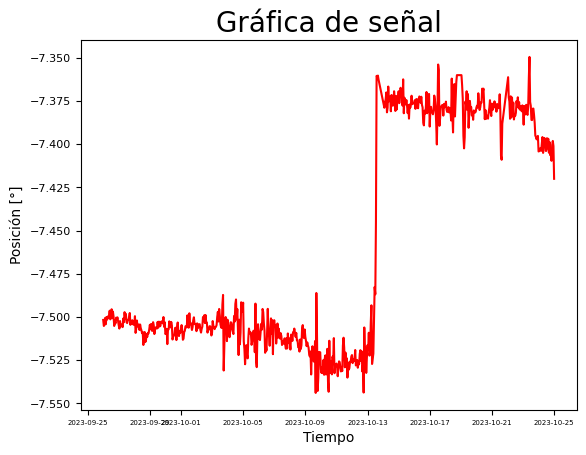

In [821]:
# Se asignan variables a las columnas de la base de dato para un código mas sencillo
Tiempo = df_acelero["Fecha"]
Posicion = df_acelero["Posición"]
# Se procede a realizar gráfico de dispersión con biblioteca Matplot
plt.plot(
    Tiempo,
    Posicion,
    color="red",
)  # Eje x "Tiempo", eje y "Posición"
plt.title("Gráfica de señal", fontsize=20)  # Asignación de titulo al gráfico
plt.xlabel("Tiempo")  # Etiqueta del eje x
plt.ylabel("Posición [°]")  # Etiqueta del eje y
plt.xticks(fontsize=5)  # Tamaño de letra rangos en eje x
plt.yticks(fontsize=8)  # Tamaño de letra rangos en eje y
plt.show()

**Análisis:** Se evidencian dos tendencias con comportamientos diferentes, donde una de esta exhibe oscilaciones por debajo de la posición -7.450 mientras los demas datos oscilan por encima del valor mencionado. El cambio en la tendencia se produce entre el 13 y el 17 de octubre del presente año.

### 2. Calcula y muestra la línea base a partir de la cual oscila el acelerómetro.

Se entiende como línea base a la representación promedio de todos los datos de posición, por lo tanto es calculada obteniendo un promedio de los datos que conforman la variable posición

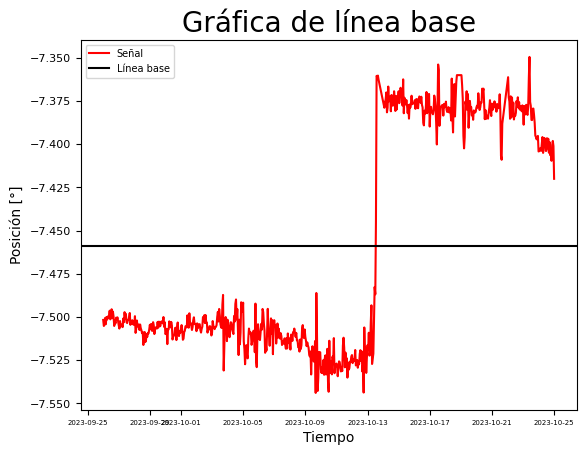

In [822]:
# Se gráfica nuevamente posición vs temperatura para observar bien la línea base propuesta
plt.plot(
    Tiempo,
    Posicion,
    color="red",
    label=f"Señal",
)  # Eje x "Tiempo", eje y "Posición"
plt.title("Gráfica de línea base", fontsize=20)  # Asignación de titulo al gráfico
plt.xlabel("Tiempo")  # Etiqueta del eje x
plt.ylabel("Posición [°]")  # Etiqueta del eje y
plt.xticks(fontsize=5)  # Tamaño de letra rangos en eje x
plt.yticks(fontsize=8)  # Tamaño de letra rangos en eje y

# Se obtienen el promedio entre todas las posiciones
promedio_posicion = np.mean(Posicion)

# Se procede a gráficar la línea base
plt.axhline(
    y=promedio_posicion,
    color="black",
    linestyle="-",
    label="Línea base",
)

plt.legend(loc="upper left", fontsize=7)  # Características de la leyenda

Sin embargo, se plantea dividir la oscilación en dos momentos debido al cambio abrupto en la señal para un mejor análisis de la información. De esta manera es posible evidenviar el comportamiento promedio o la línea base de cada serie de datos (momentos). Para esto se dividen los datos que estan por debajo y por encima del promedio calculado anteriormente y se obtiene un promedio de estos dos grupos.

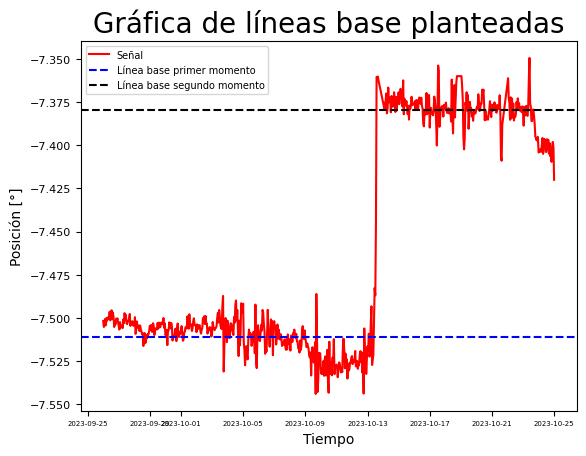

In [823]:
promedio = np.mean(Posicion)

# Se realiza una condición en el que el primer momento seran los valores de posición menores al promedio de todos los datos
momento_1 = Posicion < promedio
# Se obtiene el promedio de los valores seleccionados
promedio_momento_1 = df_acelero.loc[momento_1, "Posición"].mean()

# Se realiza una condición en el que el primer momento seran los valores de posición mayores al promedio de todos los datos
momento_2 = Posicion > promedio
# Se obtiene el promedio de los valores seleccionados
promedio_momento_2 = df_acelero.loc[momento_2, "Posición"].mean()

plt.plot(
    Tiempo,
    Posicion,
    color="red",
    label=f"Señal",
)  # Eje x "Tiempo", eje y "Posición"
plt.title("Gráfica de líneas base planteadas", fontsize=20)  # Asignación de titulo al gráfico
plt.xlabel("Tiempo")  # Etiqueta del eje x
plt.ylabel("Posición [°]")  # Etiqueta del eje y
plt.xticks(fontsize=5)  # Tamaño de letra rangos en eje x
plt.yticks(fontsize=8)  # Tamaño de letra rangos en eje y

# Se gráfica de color azul la línea base propuesta para el primer momento
plt.axhline(
    y=promedio_momento_1,
    color="blue",
    linestyle="--",
    label="Línea base primer momento",
)

# Se gráfica de color negro la línea base propuesta para el segundo momento
plt.axhline(
    y=promedio_momento_2,
    color="black",
    linestyle="--",
    label="Línea base segundo momento",
)

plt.legend(loc="upper left", fontsize=7)  # Características de la leyenda

### 3. Encuentra y muestra el valor máximo y mínimo de la posición.

Para obtener el valor máximo y mínimo de la posición se usan los métodos max() y min().

In [824]:
# Hallazgo del indice en el que se encuentra la máxima y mínima posición
idx_max = Posicion.idxmax()
idx_min = Posicion.idxmin()
# Determinación de las fechas en las que se produjeron los valores max y min de posición
fecha_max = Tiempo.loc[idx_max]
fecha_min = Tiempo.loc[idx_min]
# Se encuentra el valor max y min de la posición
max_posicion = Posicion.max().round(4)  # Disminución de cifras decimales a 4
min_posicion = Posicion.min().round(4)  # Disminución de cifras decimales a 4
# Imprimir el valor max y min de la posición con sus respectivas fechas de ocurrencia
print(f"Valor máximo de Posición: {max_posicion} Fecha: {fecha_max}")
print(f"Valor mínimo de Posición: {min_posicion} Fecha: {fecha_min}")

Valor máximo de Posición: -7.3495 Fecha: 2023-10-23 10:00:00
Valor mínimo de Posición: -7.5439 Fecha: 2023-10-09 16:00:00


Para visualizar estos puntos en el gráfico se procede a ejecutar el siguiente código que permite incluirlos en el siguiente gráfico.

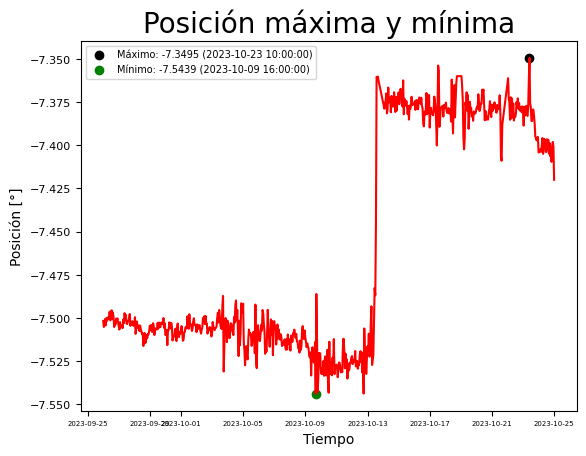

In [825]:
# Se procede a plotear nuevamente el gráfico anterior para gráficar sobre el
plt.plot(
    Tiempo,
    Posicion,
    color="red",
)  # Eje x "Tiempo", eje y "Posición"
plt.title("Posición máxima y mínima", fontsize=20)  # Asignación de titulo al gráfico
plt.xlabel("Tiempo")  # Etiqueta del eje x
plt.ylabel("Posición [°]")  # Etiqueta del eje y
plt.xticks(fontsize=5)  # Tamaño de letra rangos en eje x
plt.yticks(fontsize=8)  # Tamaño de letra rangos en eje y
# Se incorporan los puntos de interés en el gráfico
plt.scatter(
    fecha_max,  # Coordenada en x representa la fecha en la que se produce la mayor posición
    max_posicion,  # Coordenada en y representa la posición máxima
    color="black",  # Color de representación del punto
    label=f"Máximo: {max_posicion} ({fecha_max})",  # Etiquta para la leyenda
)
plt.scatter(
    fecha_min,  # Coordenada en x representa la fecha en la que se produce la menor posición
    min_posicion,  # Coordenada en y representa la posición mínima
    color="green",  # Color de representación del punto
    label=f"Mínimo: {min_posicion} ({fecha_min})",  # Etiquta para la leyenda
)
plt.legend(loc="upper left", fontsize=7)  # Características de la leyenda
plt.show()

### 4. Encuentra si hay cambios notables en la serie de tiempo más allá de la oscilación periódica.



La oscilación periódica representa un patrón repetitivo de movimientos que ocurren en intervalos regulares de tiempo con características de periodo, frecuencia y amplitud. Teniendo en cuneta estos parámetros, es posible evidenciar en la gráfica Tiempo vs Posición datos disruptivos en la oscilación periódica, algunos de estos momentos son determinados en el ejercicio 7.

### 5. Encuentra si existe alguna influencia de la temperatura en la oscilación del acelerómetro y cuantifícala.

Para visualizar si existe influencia de la temperatura con la oscilación se procede a agregar al gráfico un tercer eje con la variable "Temperatura".

Text(0, 0.5, 'Temperatura [°C]')

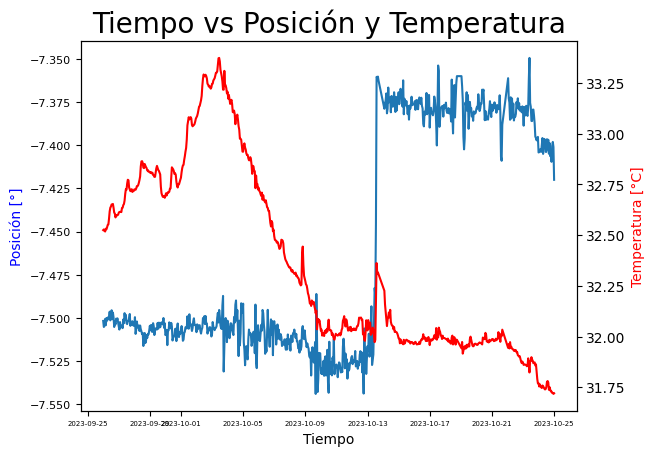

In [826]:
# Como se usara los datos de temperatura se procede a declarar una variable para esta columna
Temperatura = df_acelero["Temperatura"]
# Se gráfica la primera varibble que en este cao es Posición
fig, axes = plt.subplots()
axes.plot(Tiempo, Posicion)  # Eje x "Tiempo", eje y "Posición"
axes.set_title(
    "Tiempo vs Posición y Temperatura", fontsize=20
)  # Asignación de titulo al gráfico
axes.set_xlabel("Tiempo")  # Etiqueta del eje x
axes.set_ylabel("Posición [°]", color="b")  # Etiqueta del primer eje y en color azul
plt.xticks(fontsize=5)  # Tamaño de letra rangos en eje x
plt.yticks(fontsize=8)  # Tamaño de letra rangos en eje y
# Se gráfica la segunda varibble que en este cao es Temperatura
twin_axes = axes.twinx()
twin_axes.plot(Tiempo, Temperatura, "r")  # Eje x "Tiempo", eje y "Posición"
twin_axes.set_ylabel("Temperatura [°C]", color="r")  # Etiqueta del segundo eje y en color rojo

Es posible evidenciar que durante periodos de alta temperatura la señal del acelerómetro presenta valores bajos (menores) mientras, al haber una disminución en la temperatura, estos valores son mayores, cualitativamente se observa una relación inversamente proporcional. Sin embargo, para cuantificar dicha variación se calcula la correlación existente entre ambas variables (Posición y Temperatura) obteniendo así una medida de la fuerza y dirección de la relación lineal entre estas. 

Para calcular la correlación se usa la función .corr de la biblioteca de Pandas.

In [827]:
correlacion = Posicion.corr(Temperatura)
print(f"Correlación entre Posición y Temperatura: {correlacion}")

Correlación entre Posición y Temperatura: -0.6247660606462356


Es importante mencionar que un valor cercano a -1 indica una correlación negativa (a medida que una variable aumenta, la otra tiende a disminuir), en este caso el coeficiente de correlación es **-0.6248** representando de esta manera una correlación negativa moderada.

### 6. Encuentra y grafica el momento en el que ocurrió el mayor cambio en la serie de tiempo.

Para esta parte de la prueba se procede a calcular la diferencia entre los valores sucesivos de la variable 'Posición' y para luego identificar el valor máximo absoluto de dichas diferencias. 

- Para calcular las diferencias se usa la función .diff()

In [828]:
# Calculo de diferencia entre los valores sucesivos de Posición (se añade columna llamada Cambio_posicion)
df_acelero["Cambio_Posicion"] = Posicion.diff()
print(df_acelero)
# Encontrar el mayor cambio absoluto y la fecha en la que ocurrió
mayor_cambio = (
    df_acelero["Cambio_Posicion"].abs().max().round(4)
)  # Se halla el valor más alto de las diferencias con valor absoluto el cual definira el mayor cambio
idx_mayor_cambio = df_acelero["Cambio_Posicion"].abs().idxmax()
fecha_mayor_cambio = Tiempo.loc[idx_mayor_cambio]
print(
    f"Mayor cambio de Posición (absoluto): {mayor_cambio} Fecha:  {fecha_mayor_cambio}"
)

         Tiempo  Posición  Temperatura               Fecha  Cambio_Posicion
0    1695686400 -7.501667    32.524667 2023-09-26 00:00:00              NaN
1    1695690000 -7.505167    32.528167 2023-09-26 01:00:00        -0.003500
2    1695693600 -7.504500    32.522000 2023-09-26 02:00:00         0.000667
3    1695697200 -7.500500    32.517833 2023-09-26 03:00:00         0.004000
4    1695700800 -7.504167    32.531667 2023-09-26 04:00:00        -0.003667
..          ...       ...          ...                 ...              ...
692  1698177600 -7.409583    31.729000 2023-10-24 20:00:00        -0.003917
693  1698181200 -7.400417    31.721833 2023-10-24 21:00:00         0.009167
694  1698184800 -7.398083    31.721833 2023-10-24 22:00:00         0.002333
695  1698188400 -7.401083    31.716833 2023-10-24 23:00:00        -0.003000
696  1698192000 -7.420000    31.720000 2023-10-25 00:00:00        -0.018917

[697 rows x 5 columns]
Mayor cambio de Posición (absoluto): 0.0845 Fecha:  2023-10-13 1

Para graficar el momento en el que ocurrió este mayor cambio se representa con un punto naranja en el gráfico de dispersión Tiempo vs Posición

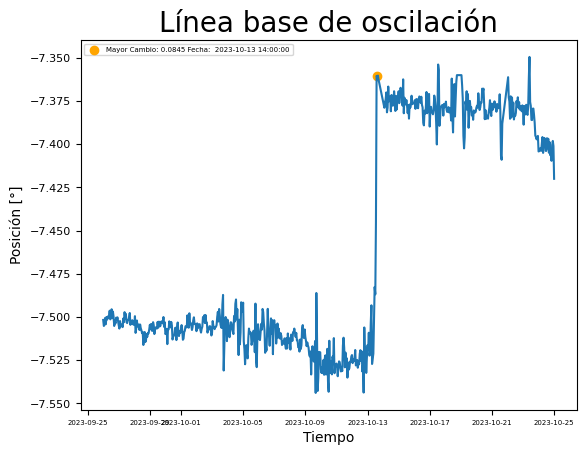

In [829]:
plt.plot(
    Tiempo,
    Posicion,
)  # Eje x "Tiempo", eje y "Posición"
plt.title("Línea base de oscilación", fontsize=20)  # Asignación de titulo al gráfico
plt.xlabel("Tiempo")  # Etiqueta del eje x
plt.ylabel("Posición [°]")  # Etiqueta del eje y
plt.xticks(fontsize=5)  # Tamaño de letra rangos en eje x
plt.yticks(fontsize=8)  # Tamaño de letra rangos en eje y
plt.scatter(
    fecha_mayor_cambio,  # Coordenada en x representa la fecha en la que se produce el mayor cambio
    Posicion.iloc[
        idx_mayor_cambio
    ],  # Coordenada en y representa la posición en la que se produce el mayor cambio
    color="orange",
    label=f"Mayor Cambio: {mayor_cambio} Fecha:  {fecha_mayor_cambio}",
    marker="o",
)
plt.legend(loc="upper left", fontsize=5)

### 7. Grafica la serie de tiempo junto con las fechas que marquen los momentos de mayores cambios

En este punto se procede a realizar un histograma con las diferencia entre los valores sucesivos de Posición determinados en el ejercicio anterior, con el objetivo de visualizar la distribución.

Text(0, 0.5, 'Frecuencia')

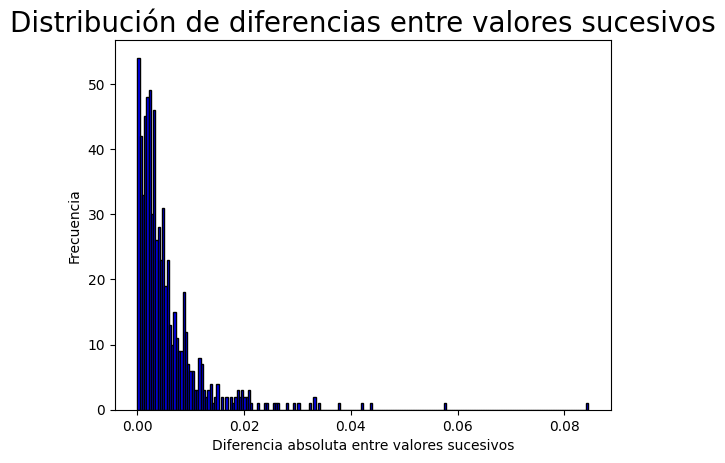

In [830]:
data = df_acelero["Cambio_Posicion"].abs()
plt.hist(data, bins=200, color="blue", edgecolor="black")
plt.title(
    "Distribución de diferencias entre valores sucesivos", fontsize=20
)  # Asignación de titulo al gráfico
plt.xlabel("Diferencia absoluta entre valores sucesivos")  # Etiqueta del eje x
plt.ylabel("Frecuencia")  # Etiqueta del eje y

Como se logra observar en el histograma, las diferencias se encuentran entre valores de 0 y 0.02 aproximadamente, por este motivo se considerara como momentos de mayor cambio a aquellos que sean mayores a 0.02

In [831]:
umbral = 0.02
cambios_mayores = df_acelero[
    data > umbral
]
print(cambios_mayores)


         Tiempo  Posición  Temperatura               Fecha  Cambio_Posicion
186  1696356000 -7.530950    33.217314 2023-10-03 18:00:00        -0.043745
210  1696442400 -7.501535    33.020000 2023-10-04 18:00:00         0.020465
217  1696467600 -7.514083    32.943314 2023-10-05 01:00:00        -0.022408
235  1696532400 -7.492222    32.731667 2023-10-05 19:00:00         0.028128
236  1696536000 -7.525428    32.793875 2023-10-05 20:00:00        -0.033206
328  1696867200 -7.543917    32.114417 2023-10-09 16:00:00        -0.030012
329  1696870800 -7.486078    32.127471 2023-10-09 17:00:00         0.057839
330  1696874400 -7.509822    32.035496 2023-10-09 18:00:00        -0.023745
331  1696878000 -7.542786    32.069059 2023-10-09 19:00:00        -0.032963
349  1696942800 -7.513714    32.036369 2023-10-10 13:00:00         0.029536
357  1696971600 -7.532500    31.984389 2023-10-10 21:00:00        -0.020306
403  1697137200 -7.506038    31.983228 2023-10-12 19:00:00         0.037673
415  1697180

Estas variaciones se ubican en la serie de tiempo de la sigiente manera:

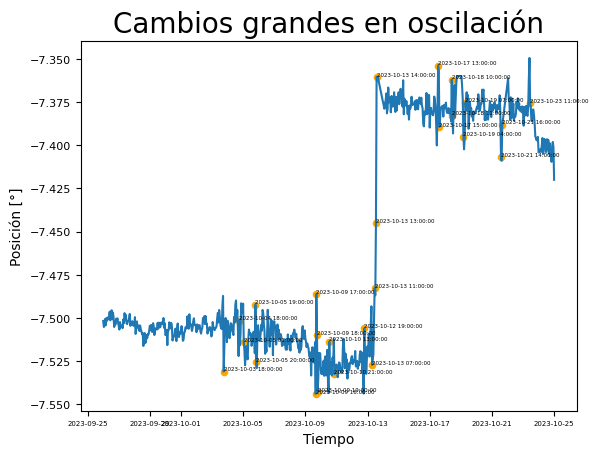

In [832]:
plt.plot(
    Tiempo,
    Posicion,
)  # Eje x "Tiempo", eje y "Posición"
plt.title(
    "Cambios grandes en oscilación", fontsize=20
)  # Asignación de titulo al gráfico
plt.xlabel("Tiempo")  # Etiqueta del eje x
plt.ylabel("Posición [°]")  # Etiqueta del eje y
plt.xticks(fontsize=5)  # Tamaño de letra rangos en eje x
plt.yticks(fontsize=8)  # Tamaño de letra rangos en eje y
# Se procede a graficar los puntos de grandes cambios
plt.scatter(
    cambios_mayores[
        "Fecha"
    ],  # Coordenada en x represent la fecha en la que se produce un cambio grande
    cambios_mayores[
        "Posición"
    ],  # Coordenada en y representa la posición en la que se produce un cambio grande
    color="orange",
    s=20,
)
# Se requiere iterar para cada uno de los cambios mayores
for i, row in cambios_mayores.iterrows():
    plt.text(
        row["Fecha"],
        row["Posición"],
        row["Fecha"].strftime("%Y-%m-%d %H:%M:%S"),
        fontsize=4,
        ha="left",
        va="bottom",
        color="black",
    )

### 8. Escribe un algoritmo que encuentre estos momentos de manera automática

In [833]:
def encontrar_momentos(df, columna, umbral):

    # Filtrar las variaciones que están por encima del umbral
    seleccion = df[data > umbral]

    return seleccion


encontrar_momentos(df_acelero, data, umbral)

,Tiempo,Posición,Temperatura,Fecha,Cambio_Posicion
186,1696356000,-7.530950,33.217314,2023-10-03 18:00:00,-0.043745
210,1696442400,-7.501535,33.020000,2023-10-04 18:00:00,0.020465
217,1696467600,-7.514083,32.943314,2023-10-05 01:00:00,-0.022408
235,1696532400,-7.492222,32.731667,2023-10-05 19:00:00,0.028128
236,1696536000,-7.525428,32.793875,2023-10-05 20:00:00,-0.033206
328,1696867200,-7.543917,32.114417,2023-10-09 16:00:00,-0.030012
329,1696870800,-7.486078,32.127471,2023-10-09 17:00:00,0.057839
330,1696874400,-7.509822,32.035496,2023-10-09 18:00:00,-0.023745
331,1696878000,-7.542786,32.069059,2023-10-09 19:00:00,-0.032963
349,1696942800,-7.513714,32.036369,2023-10-10 13:00:00,0.029536


Se observa que el algoritmo funciona bien permitiendo encontrar de manera automática los momentos con diferencias por encima del umbral (>0.02)

### 9. Implementa un filtro que reduzca el ruido que encuentras en la señal para suavizarla que no remueva los cambios de interés en ella. Luego, muestra la señal original y la señal procesada en un gráfico para compararlas.

Para este ejericio se plantea aumentar el número de ventanas al momento de calcular la media movil. Esto permite disminuir el ruido suavizando la línea sin remover los cambios de interés. En este caso, se usaron 8 ventanas ya que despues de varios ensayos se propone que este número es aceptable para la finalidad del ejercicio.

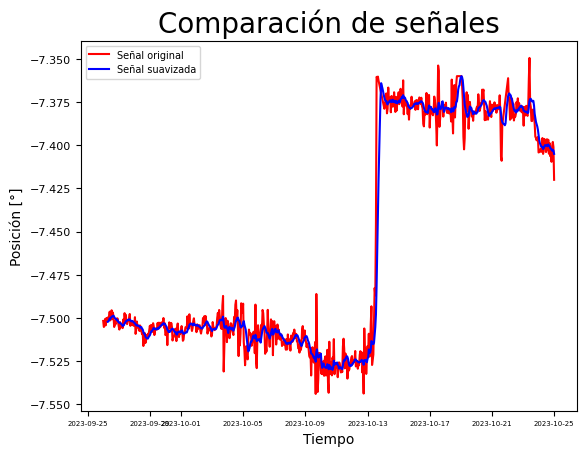

In [834]:
plt.plot(
    Tiempo,
    Posicion,
    color="red",
    label=f"Señal original",
)  # Eje x "Tiempo", eje y "Posición"
plt.title("Comparación de señales", fontsize=20)  # Asignación de titulo al gráfico
plt.xlabel("Tiempo")  # Etiqueta del eje x
plt.ylabel("Posición [°]")  # Etiqueta del eje y
plt.xticks(fontsize=5)  # Tamaño de letra rangos en eje x
plt.yticks(fontsize=8)  # Tamaño de letra rangos en eje y
# Se procede a calcular la media movil con 8 ventanas
ventana_movil = 8
df_acelero["Media_Movil"] = Posicion.rolling(window=ventana_movil).mean()
plt.plot(
    Tiempo,
    df_acelero["Media_Movil"],
    color="blue",
    label=f"Señal suavizada",
)  # Eje x "Tiempo", eje y "Media móvil de los valores de posición"
plt.legend(loc="upper left", fontsize=7)

### 10. Plantea y describe una funcionalidad adicional de tu elección que demuestre tus habilidades en el análisis de señales y series de tiempo.


Con el objetivo de detectar eficientemente datos anómalos o fuera de los rangos esperados, se propone desarrollar un modelo predictivo que alerte a los usuarios de la base de datos sobre lecturas inusuales. Para implementar esta estrategia, se requiere acceder a una base de datos más robusta y con históricos extensos que permitan identificar tendencias en el comportamiento de las variables. Esto posibilitará determinar patrones atípicos en los datos y establecer reglas para el modelo de predicción.

Una vez definidos los criterios de decisión (por ejemplo, una serie de datos que se encuentre Y veces por encima o por debajo de la desviación estándar), se asignarán pesos a las variables más relevantes. Esto se hace con el propósito de priorizar aquellas con mayor correlación respecto a la variable que se pretende predecir. Posteriormente, se plantea la creación de un tablero de visualización o un reporte integrado. Este permitirá a los usuarios observar, en un rango de tiempo específico, la tendencia esperada para la variable "posición del acelerómetro".

Este tablero incluirá un gráfico de error que facilitará la comparación entre los datos predichos y los valores reales una vez que sean capturados por el acelerómetro. De esta manera, se establecerán estrategias adicionales para reducir el error y se considerará el reentrenamiento del modelo a medida que se ingresen nuevos datos.

## Punto 2: Análisis de ráster

Primero se procede a cargar cada raster utilizando la biblioteca Rasterio

In [835]:
# Se cargan ambos raster
raster_2021 = rio.open("./20211119_monitoreo.tif")
raster_2023 = rio.open("./20230721_monitoreo.tif")

# Se procede a leer la información de cada uno de ellos
data_2021 = raster_2021.read(1)
data_2023 = raster_2023.read(1)

Con la libreria Numpy se procede a determinar máximos y mínimos de alturas existentes en cada raster

In [836]:
# Se obtienen datos estadísticos de cada raster para posterior diferenciación
print(f"Datos estadísticos raster 2021")
print(f"Máxima altura: {np.max(data_2021)}")
print(f"Mínima altura: {np.min(data_2021)}")

print(f"Datos estadísticos raster 2023")
print(f"Máxima altura: {np.max(data_2023)}")
print(f"Mínima altura: {np.min(data_2023)}")

Datos estadísticos raster 2021
Máxima altura: 2091.93701171875
Mínima altura: -10000.0
Datos estadísticos raster 2023
Máxima altura: 2093.3232421875
Mínima altura: -3.4028234663852886e+38


Se observa que la altura máxima entre los dos modelos de elevación digital tiene una varación inferior a 2 metros mientras la diferencia en la altura mínima no puede ser cuantificada debido a la presencia de datos anomalos en los pixeles de ambos modelos.

En el siguiente gráfico se evidencia que ambos modelos no presentan diferencias de altura na lo largo del área que ocupan ambos modelos.

Matriz de diferencia de alturas:
[[3.4028235e+38 3.4028235e+38 3.4028235e+38 ... 3.4028235e+38
  3.4028235e+38 3.4028235e+38]
 [3.4028235e+38 3.4028235e+38 3.4028235e+38 ... 3.4028235e+38
  3.4028235e+38 3.4028235e+38]
 [3.4028235e+38 3.4028235e+38 3.4028235e+38 ... 3.4028235e+38
  3.4028235e+38 3.4028235e+38]
 ...
 [3.4028235e+38 3.4028235e+38 3.4028235e+38 ... 3.4028235e+38
  3.4028235e+38 3.4028235e+38]
 [3.4028235e+38 3.4028235e+38 3.4028235e+38 ... 3.4028235e+38
  3.4028235e+38 3.4028235e+38]
 [3.4028235e+38 3.4028235e+38 3.4028235e+38 ... 3.4028235e+38
  3.4028235e+38 3.4028235e+38]]


Text(0, 0.5, 'Latitud')

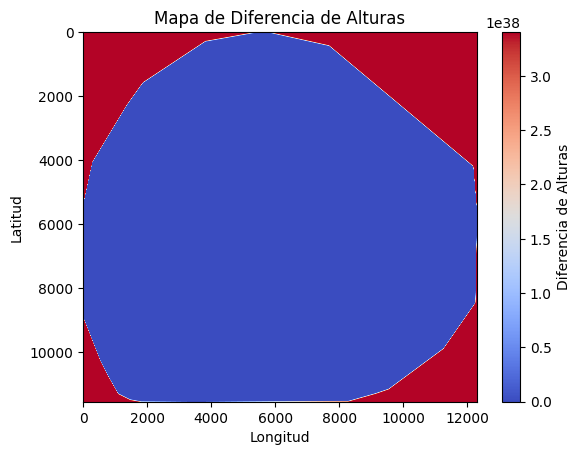

In [837]:
# Se procede a realizar la resta entre las matrices de cada raster, dando como resultado la diferencia de altura
diferencia_alturas = np.subtract(data_2021, data_2023)
print("Matriz de diferencia de alturas:")
print(diferencia_alturas)

# Se gráfica estas diferencia en el área que cubren los DEM
plt.imshow(diferencia_alturas, cmap="coolwarm", origin="upper")
plt.colorbar(label="Diferencia de Alturas")
plt.title("Mapa de Diferencia de Alturas")
plt.xlabel("Longitud")
plt.ylabel("Latitud")

Por último se realizan diferentes perfiles topográficos en cada raster con diferentes filas de la matriz (diferentes ubicaciones en el área de estudio) para compararlos.

Primero se realiza un perfil topográfico en la fila 298 del raster del año 2021

Text(0, 0.5, 'Diferencia de Alturas')

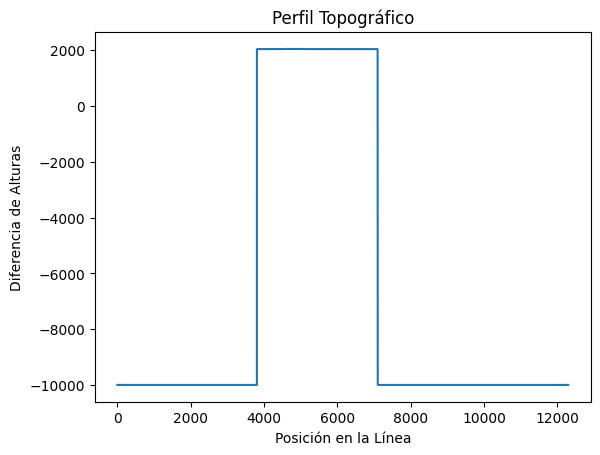

In [840]:
fila = 298
perfil = data_2021[fila, :]
plt.plot(perfil)
plt.title("Perfil Topográfico")
plt.xlabel("Posición en la Línea")
plt.ylabel("Diferencia de Alturas")

Luego se realiza el perfil topográfico en la misma fila pero con el raster del año 2023

Text(0, 0.5, 'Diferencia de Alturas')

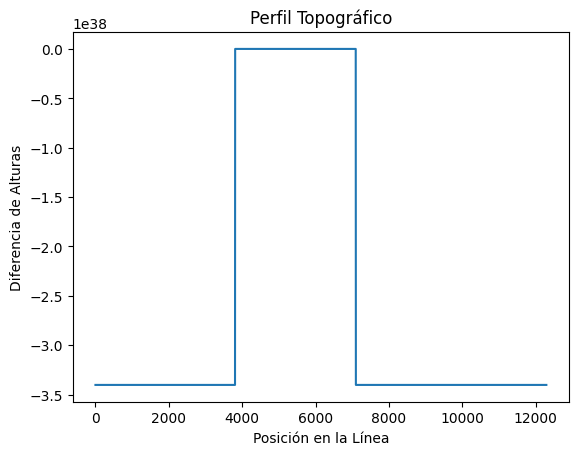

In [841]:
fila = 298
perfil = data_2023[fila, :]
plt.plot(perfil)
plt.title("Perfil Topográfico")
plt.xlabel("Posición en la Línea")
plt.ylabel("Diferencia de Alturas")

Se observa que ambos gráficos no presentan variaciones en la topografía evidenciando lo mencionado anteriormente.